In [3]:
import pandas as pd
import pickle 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings("ignore", message="X has feature names")

In [4]:
for dirname, _, filenames in os.walk('feature_engineer_df.pkl'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [36]:
with open('feature_engineer_df.pkl', 'rb') as f:
    df= pickle.load(f)

In [37]:
df['isFraud'].value_counts()

0    7765
1    7675
Name: isFraud, dtype: int64

In [38]:
X= df.drop(['isFraud'],axis=1)
y= df['isFraud']
print(X.shape,y.shape)

(15440, 7) (15440,)


In [13]:
#spillting Dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(11580, 7) (3860, 7) (3860,) (11580,)


In [14]:
#Data Scalling

In [40]:
scaler = StandardScaler()
#fit scaler on traing data
scaler.fit(X_train)
#transform scaler on train and test data
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [16]:
#Using Randomforast Model

In [41]:
model = RandomForestClassifier(n_estimators=25, random_state=0)
model.fit(X_scaled_train,y_train)
y_F_predict=model.predict(X_scaled_test)

In [42]:
# Quick evaluation
Train_Accuracy_F = model.score(X_scaled_train, y_train)
Test_Accuracy_F = model.score(X_scaled_test, y_test)
print(f'Training accuracy: {Train_Accuracy_F*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy_F*100:.2f} %')

Training accuracy: 99.98 %
Testing accuracy: 98.99 %


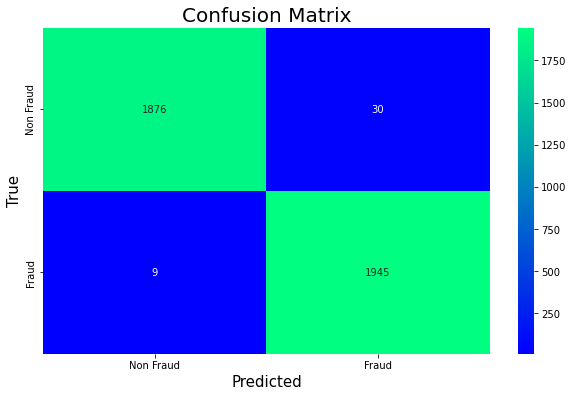

In [43]:
# Confusion Matrix
label=["Non Fraud","Fraud"]
cf_matrix=confusion_matrix(y_test,y_F_predict)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix,annot=True,fmt="d",xticklabels=label,yticklabels=label,cmap="winter")
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("True",fontsize=15)
plt.title("Confusion Matrix",fontsize=20)
plt.show()

In [44]:
print(classification_report(y_test,y_F_predict,target_names=label))

              precision    recall  f1-score   support

   Non Fraud       1.00      0.98      0.99      1906
       Fraud       0.98      1.00      0.99      1954

    accuracy                           0.99      3860
   macro avg       0.99      0.99      0.99      3860
weighted avg       0.99      0.99      0.99      3860



['FraudModel.pkl']

In [47]:
with open('fraud_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [50]:
with open('fraud_detection_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [48]:
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
994791,45,0,5188875.35,5188875.35,0.00,11465.00,5020573.28
5253580,371,3,205163.30,205163.30,0.00,0.00,0.00
1551337,154,0,178911.38,33177.00,0.00,1311323.08,1490234.47
599190,33,2,157702.34,5349055.82,5506758.16,1825889.93,1668187.59
3390046,255,2,62762.73,807140.38,869903.10,1086436.16,1023673.43
...,...,...,...,...,...,...,...
6065313,512,0,718350.64,718350.64,0.00,0.00,718350.64
567306,23,2,38136.13,8743280.59,8781416.72,175050.30,136914.17
2376232,192,0,585511.14,585511.14,0.00,67757.07,653268.21
3828476,282,3,481.90,481.90,0.00,0.00,0.00


In [51]:
input_data = pd.DataFrame({
    "step":[1],
    "type":[3],
    "amount":[150],
    "oldbalanceOrg":[92852.00],
    "newbalanceOrig":[7679741.48],
    "oldbalanceDest":[16428780.87],
    "newbalanceDest":[19169204.93]
})

prediction = loaded_model.predict(input_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [52]:
# Retrieve feature names from training data
feature_names = X_train.columns.tolist()
feature_names

['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [53]:
# Define a function to predict fraud
def predict_fraud(transaction_features):
    # Convert the input to a DataFrame with correct feature names
    input_data = pd.DataFrame([transaction_features], columns=feature_names)

    # Make a prediction
    prediction = model.predict(input_data)

    # Map the prediction back to labels
    return "Fraud" if prediction[0] == 1 else "Non Fraud"

In [54]:
# Example of transaction features (replace with actual features as per your dataset)
# Ensure the order and the number of features match those used for training
transaction_example = {
    "step":1,
    "type":2,
    "amount":150,
    "oldbalanceOrg": 92852.00	,
    "newbalanceOrig":7679741.48,
    "oldbalanceDest":16428780.87,
    "newbalanceDest":19169204.93,
    
}
# Predicting if the example transaction is fraud or not
result = predict_fraud(transaction_example)
print(f"The transaction is: {result}")

The transaction is: Non Fraud


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [55]:
#another example 
transaction_example01 = {
    "step":736,
    "type":2,
    "amount":10000000.00,
    "oldbalanceOrg": 11314660.84	,
    "newbalanceOrig":1314660.84,
    "oldbalanceDest":0.00,
    "newbalanceDest":0.00,
}

# Predicting if the example transaction is fraud or not
result = predict_fraud(transaction_example01)
print(f"The transaction is: {result}")

The transaction is: Fraud


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [1]:
!pip freeze


absl-py==1.4.0
adal==1.2.7
aiohttp @ file:///C:/ci/aiohttp_1646806572557/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
alembic==1.8.1
altair==5.4.1
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argcomplete==3.5.1
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1650634291321/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-timeout @ file:///tmp/build/80754af9/async-timeout_1637851218186/work
atomicwrites==1.4.0


pylint @ file:///C:/ci/pylint_1627536884966/work
pyls-spyder==0.4.0
PyNaCl @ file:///C:/ci/pynacl_1607612759007/work
pyodbc @ file:///C:/ci/pyodbc_1647426110990/work
pyOpenSSL @ file:///tmp/build/80754af9/pyopenssl_1635333100036/work
pyparsing @ file:///tmp/build/80754af9/pyparsing_1635766073266/work
pypiwin32==223
PyQt5==5.15.7
PyQt5-Qt5==5.15.2
PyQt5-sip==12.11.0
pyreadline==2.1
pyreadline3==3.5.4
pyrsistent @ file:///C:/ci/pyrsistent_1636093225342/work
PySocks @ file:///C:/ci/pysocks_1605307512533/work
pytest==7.1.1
python-dateutil @ file:///tmp/build/80754af9/python-dateutil_1626374649649/work
python-lsp-black @ file:///tmp/build/80754af9/python-lsp-black_1634232156041/work
python-lsp-jsonrpc==1.0.0
python-lsp-server==1.2.4
python-slugify @ file:///tmp/build/80754af9/python-slugify_1620405669636/work
python-snappy @ file:///C:/ci/python-snappy_1610133405910/work
pyttsx3==2.98
pytz==2021.3
pyviz-comms @ file:///tmp/build/80754af9/pyviz_comms_1623747165329/work
PyWavelets @ file:///C

In [6]:
print(sns.__version__)

0.11.2
